from
# [The Ultimate Guide to Data Cleaning in Python](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
Techniques on data cleaning and pre-processing 
>Data cleaning or cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading data to df
df = pd.read_csv('dirtyData.csv')
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


## Technique 1: Missing Data Heatmap
Using a small number of features we can visualize the volume of missing data with a heatmap

In [3]:
cols_to_check = df.columns[3:30]
cols_to_check

Index(['life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room',
       'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m',
       'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool',
       'preschool_quota', 'preschool_education_centers_raion',
       'children_school', 'school_quota', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25'],
      dtype='object')

In [4]:
df[cols_to_check].isnull()

,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,...,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25
0,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,True,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,True,False,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


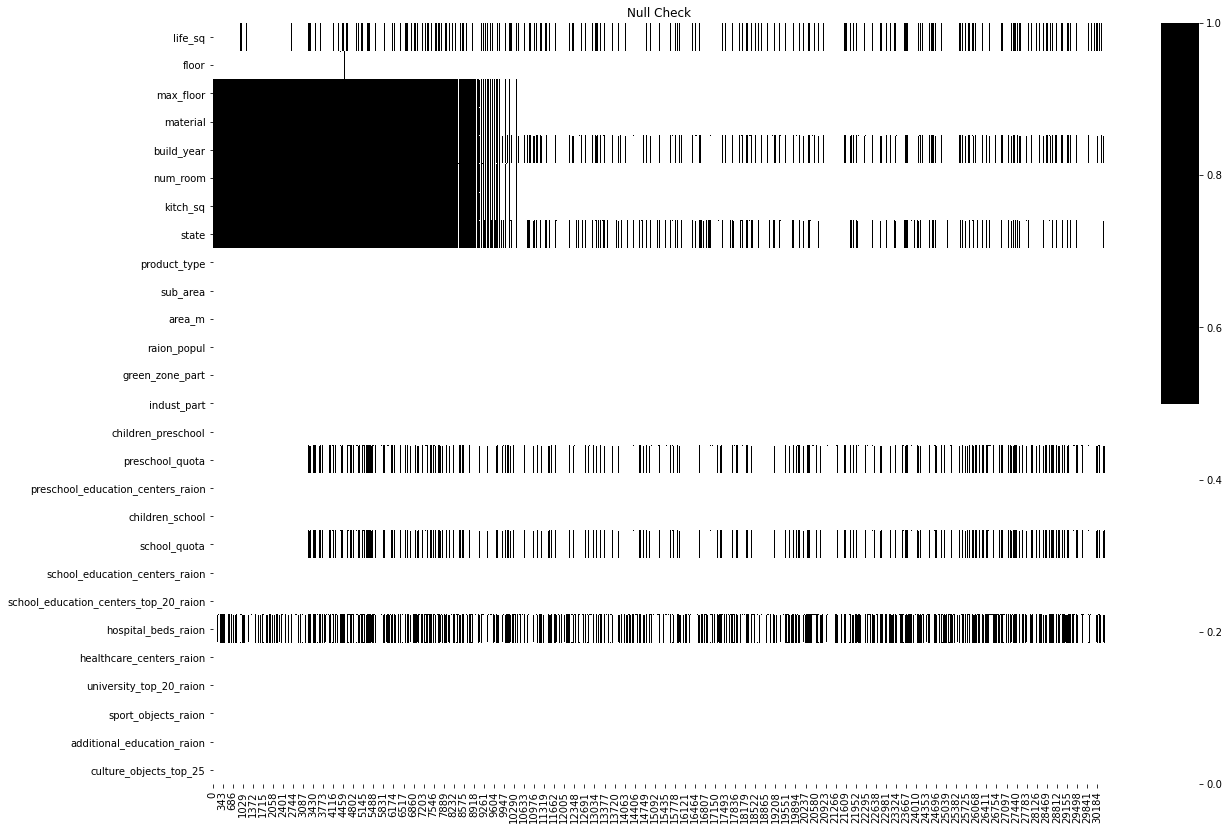

In [11]:
plt.rcParams['figure.figsize'] = (20,14)

colors = ['#ffffff', '#000000']
sns.heatmap(df[cols_to_check].T.isnull(), cmap = sns.color_palette(colors))
plt.title('Null Check')
plt.show()